In [35]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [36]:
# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")
# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros.
sns.set_theme(style="dark")
# establece el estilo en Solarize_Lihgt2.
plt.style.use('dark_background')

In [37]:
df = pd.read_csv('datos_vuelos.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   country                      405624 non-null  object 
 2   province                     405624 non-null  object 
 3   city                         405624 non-null  object 
 4   postal_code                  405624 non-null  object 
 5   gender                       405624 non-null  object 
 6   education                    405624 non-null  object 
 7   salary                       405624 non-null  object 
 8   marital_status               405624 non-null  object 
 9   loyalty_card                 405624 non-null  object 
 10  customer_lifetime_value      405624 non-null  float64
 11  enrollment_type              405624 non-null  object 
 12  enrollment_year              405624 non-null  int64  
 13 

¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

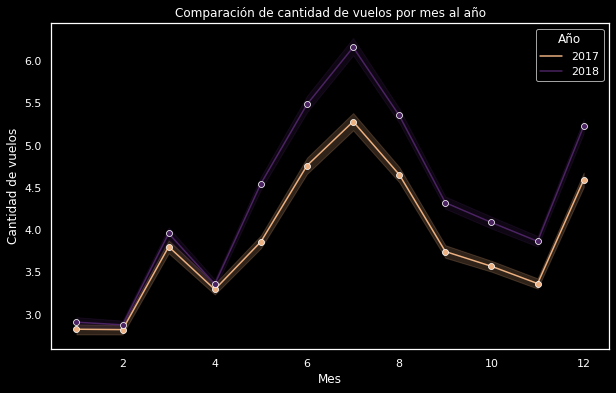

In [38]:
# Crear un gráfico de líneas usando Seaborn para comparar los dos años
plt.figure(figsize=(10, 6))
sns.lineplot(x='flying_month', y='flights_booked', hue='flying_year', data=df, marker='o', palette='flare')
plt.title('Comparación de cantidad de vuelos por mes al año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos')
plt.legend(title='Año')
plt.show()

¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [39]:
df["points_accumulated"].describe

<bound method NDFrame.describe of 0           0.0
1         282.0
2           0.0
3           0.0
4         335.0
          ...  
405619      0.0
405620      0.0
405621      0.0
405622      0.0
405623      0.0
Name: points_accumulated, Length: 405624, dtype: float64>

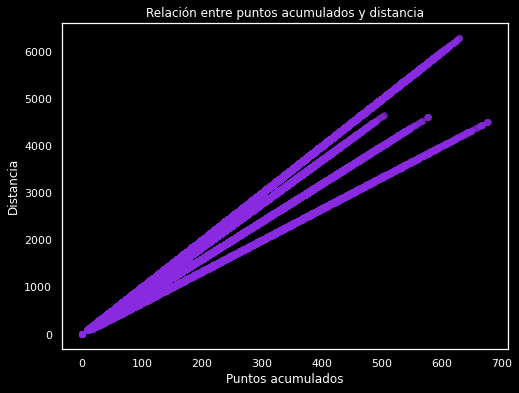

In [40]:
# Gráfico de dispersión para visualizar la relación entre las dos variables
plt.figure(figsize=(8, 6))
plt.scatter(df['points_accumulated'], df['distance'], alpha=0.5, c='blueviolet')
plt.title('Relación entre puntos acumulados y distancia')
plt.xlabel('Puntos acumulados')
plt.ylabel('Distancia')
plt.show()

¿Cuál es la distribución de los clientes por provincia o estado?

In [41]:
# Eliminar duplicados basados en la columna 'loyalty_number'
#unique_clients_df = df.drop_duplicates(subset='loyalty_number')

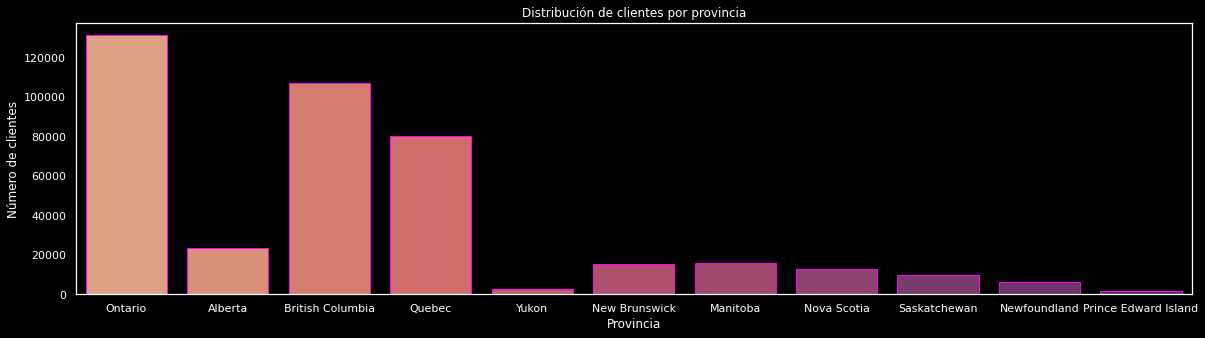

In [42]:
#Para calcular la distribución de clientes segun la provincia.

plt.figure(figsize=(20, 5))
sns.countplot(x='province', data=df, palette='flare', edgecolor='fuchsia')

# Etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes por provincia')

plt.show()

¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [43]:
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')  # 'coerce' convierte valores no numéricos a NaN

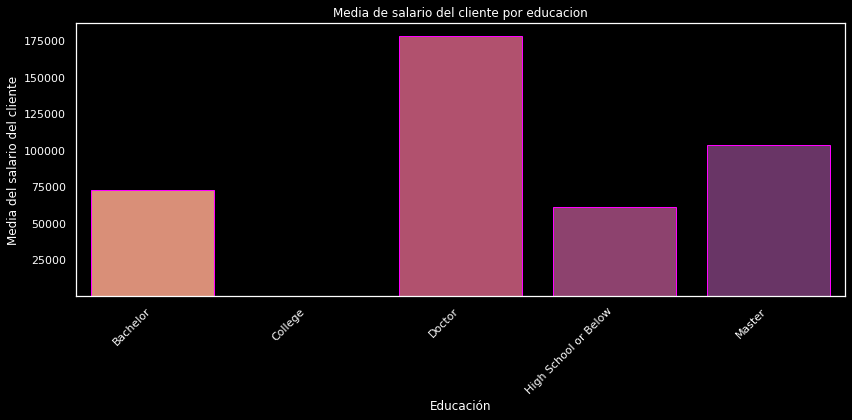

In [44]:

sns.set(style="dark")
sns.set_theme(style="dark")
plt.style.use('dark_background')


mean_satisfaction = df.groupby('education')['salary'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='salary', data=mean_satisfaction, palette='flare', edgecolor='fuchsia')

# Etiquetas y título
plt.xlabel('Educación')
plt.ylabel('Media del salario del cliente')
plt.title('Media de salario del cliente por educacion')

plt.xticks(rotation=45, ha='right')


plt.ylim(2, None)
plt.tight_layout()
plt.show()

¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

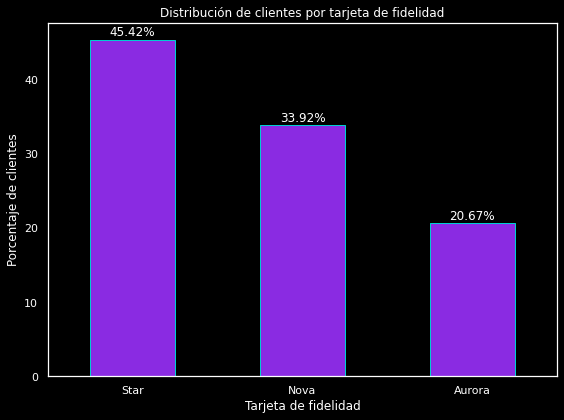

In [45]:
# Obtener la distribución de clientes por tarjeta de fidelidad
tarjetas = df['loyalty_card'].value_counts()

# Calcular los porcentajes
total_clientes = len(df)
porcentajes = (tarjetas / total_clientes) * 100

plt.figure(figsize=(8, 6))
# Graficar los porcentajes
porcentajes.plot(kind='bar', color='blueviolet', edgecolor='darkturquoise')

# Etiquetas y título
plt.xlabel('Tarjeta de fidelidad')
plt.ylabel('Porcentaje de clientes')
plt.title('Distribución de clientes por tarjeta de fidelidad')

# Mostrar los porcentajes en las barras
for i, porcentaje in enumerate(porcentajes):
    plt.text(i, porcentaje + 0.5, f'{porcentaje:.2f}%', ha='center')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

¿Cómo se distribuyen los clientes según su estado civil y género?

In [46]:
# Eliminar duplicados basados en la columna 'loyalty_number'
unique_clients_df = df.drop_duplicates(subset='loyalty_number')

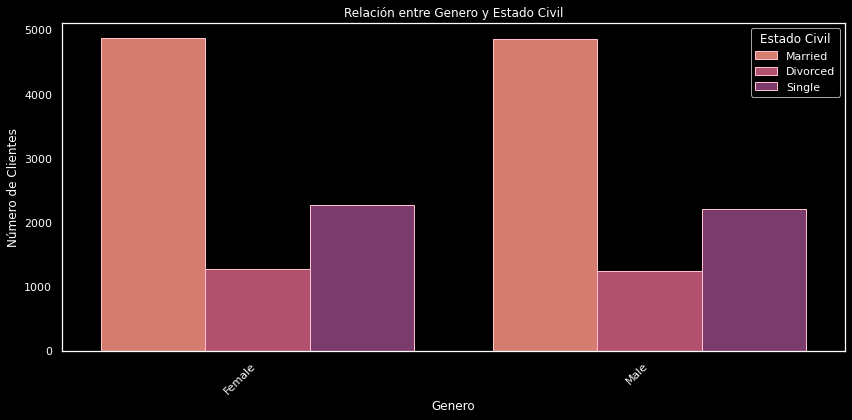

In [47]:
#Ver la relación entre el estado civil del cliente y el su genero
sns.set(style="dark")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros.
sns.set_theme(style="dark")
# establece el estilo en Solarize_Lihgt2.
plt.style.use('dark_background')

plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='marital_status', data=unique_clients_df, palette='flare', edgecolor='pink')

# Etiquetas y título
plt.xlabel('Genero')
plt.ylabel('Número de Clientes')
plt.title('Relación entre Genero y Estado Civil')


plt.legend(title='Estado Civil')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [48]:
df_filtrado = df[["flights_booked", "education"]]
df_filtrado

,flights_booked,education
0,0,Bachelor
1,3,Bachelor
2,0,Bachelor
3,0,Bachelor
4,6,Bachelor
...,...,...
405619,0,Bachelor
405620,0,Bachelor
405621,0,Bachelor
405622,0,Bachelor


In [49]:
df_filtrado.groupby('education')['flights_booked'].describe().T


education,Bachelor,College,Doctor,High School or Below,Master
count,253752.000000,102672.000000,17856.000000,19008.000000,12336.000000
mean,4.091093,4.153012,4.146281,4.155777,4.184014
std,5.216995,5.242136,5.250093,5.234551,5.210294
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [52]:
df_filtrado['grupo'] = np.where(df_filtrado['flights_booked']>=10, 'vuelan_mazo', 'vuelan_menos')

In [53]:
vuelan_mazo= df_filtrado["grupo"]=="vuelan_mazo"
vuelan_menos= df_filtrado["grupo"]=="vuelan_menos"

In [55]:
bachelor=df_filtrado["education"]=="Bachelor"
collage=df_filtrado["education"]=="Collage"
master=df_filtrado["education"]=="Master"
high=df_filtrado["education"]=="High School or Below"
dr=df_filtrado["education"]=="Doctor"

<AxesSubplot:xlabel='grupo', ylabel='count'>

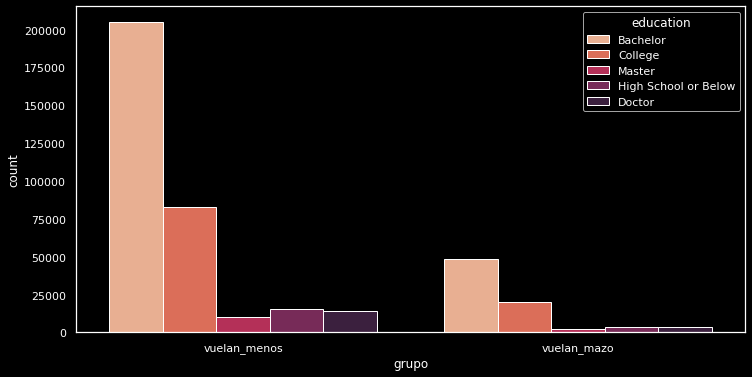

In [74]:
plt.figure(figsize=(12, 6))

sns.countplot(x="grupo", hue="education", data=df_filtrado,  palette = "rocket_r")

In [75]:

# Obtener los datos para cada nivel educativo
bachelor = df_filtrado[df_filtrado['education'] == 'Bachelor']['flights_booked']
college = df_filtrado[df_filtrado['education'] == 'College']['flights_booked']
master = df_filtrado[df_filtrado['education'] == 'Master']['flights_booked']
high= df_filtrado[df_filtrado['education'] == 'High School or Below']['flights_booked']
doctor = df_filtrado[df_filtrado['education'] == 'Doctor']['flights_booked']

# Realizar el test ANOVA
f_stat, p_value = f_oneway(bachelor, college, master, high, doctor)

# Mostrar los resultados
print("Estadística F:", f_stat)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
            
          """)

else:
    print("No hay evidencia de diferencias significativas en el tiempo promedio entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas
          
          """)

Estadística F: 3.673394618107777
Valor p: 0.0053813763400946376
Hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.

 ---------- 


          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
            
          
